In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [91]:
data = pd.read_csv("Alpha_dataset.csv")
print(data.to_string())

     Sleep Duration  Quality of Sleep  Weight_Category_BMI  Gender_Numerical  Physical Activity Level (scaled)  Heart Rate (scaled)  Daily Steps (scaled)  Age (scaled)  Stress_Binary
0               6.1                 6                    2                 1                          4.727273             7.909091              4.779478      3.363636              1
1               6.2                 6                    1                 1                          6.363636             7.727273             10.000000      3.454545              1
2               5.9                 4                    3                 1                          3.636364             8.636364              3.699370      3.454545              1
3               5.9                 4                    3                 1                          3.636364             8.636364              3.699370      3.454545              1
4               6.3                 6                    3                 1         

In [92]:
X = data.drop("Stress_Binary", axis=1)
y = data["Stress_Binary"]

<Axes: >

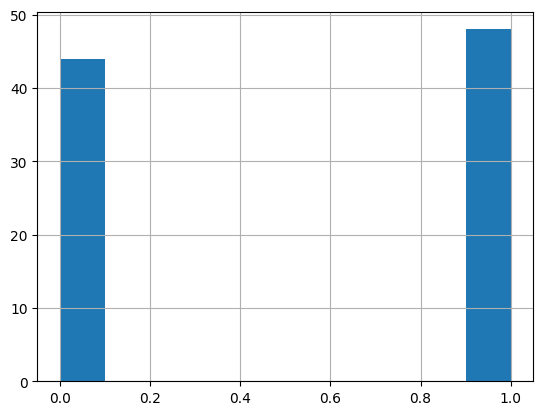

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train.hist()

In [97]:
rf = RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")

Accuracy: 0.925
Recall: 0.9473684210526315
Precision: 0.9


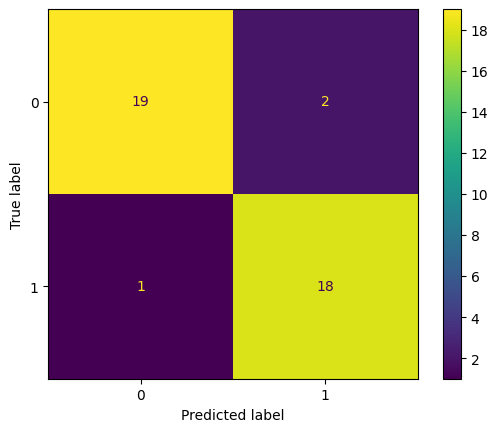

In [98]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3, 4, 5],
    'n_estimators': [25, 50, 75, 100, 200],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [5, 6, 7, 8, 9, 10]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 5, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=25;, score=0.774 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=25;, score=0.806 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=50;, score=0.871 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=50;, score=0.968 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=50;, score=0.967 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=75;, score=0.774 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=2, min_samples_leaf=5, n_estimators=75;, score=0.903 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=2, min_sam